In [1]:
# Deep Learning - Project 1 - Kavya Gupta

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Signal.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Check for missing values and print percentage for each attribute.

df.isna().sum()/len(df)*100

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

In [7]:
# Check for presence of duplicate records in the dataset :

df.duplicated().sum()

240

In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.duplicated().sum()

0

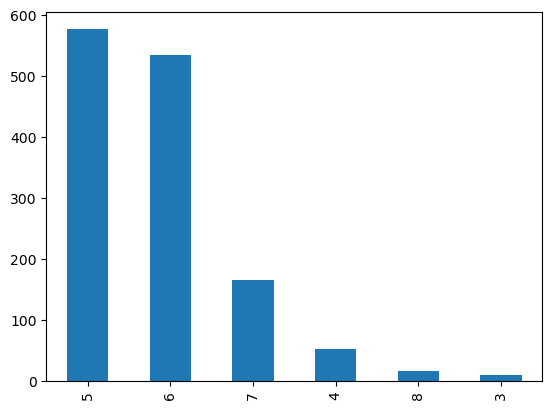

In [10]:
# Visualize distribution of the target variable

df.Signal_Strength.value_counts().plot(kind='bar')
plt.show()

In [11]:
# Split the data into X & Y.

x = df.drop('Signal_Strength', axis=1)
y = df['Signal_Strength']

In [12]:
# Split the data into train & test with 70:30 proportion.

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=34)

In [13]:
# Print shape of all the 4 variables and verify if train and test data is in sync :

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(951, 11)

(951,)

(408, 11)

(408,)


In [14]:
# Normalize the train and test data with appropriate method :

scaler = StandardScaler().fit(x_train)

sx_train = scaler.transform(x_train)
sx_test = scaler.transform(x_test)

In [15]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [16]:
# Neural Network to train the classifier:

nn_modelcl = Sequential()

# Input Layer:

nn_modelcl.add(Dense(11, kernel_initializer='normal', input_dim = x_train.shape[1], activation='sigmoid'))
nn_modelcl.add(BatchNormalization())
nn_modelcl.add(Dense(9, activation='sigmoid'))

# Output Layer:

nn_modelcl.add(Dense(6, activation='softmax'))  

# Compiling the network:

nn_modelcl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_modelcl.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 11)                132       

                                                                 

 batch_normalization (BatchN  (None, 11)               44        

 ormalization)                                                   

                                                                 

 dense_1 (Dense)             (None, 9)                 108       

                                                                 

 dense_2 (Dense)             (None, 6)                 60        

                                                                 


Total params: 344

Trainable params: 322

Non-trainable params: 22

_________________________________________________________________


In [17]:
model_train = nn_modelcl.fit(sx_train, y_train, validation_data=(sx_test, y_test), epochs=50, batch_size=125)

Epoch 1/50

8/8 [==============================] - 1s 48ms/step - loss: 2.1533 - accuracy: 0.1619 - val_loss: 2.2055 - val_accuracy: 0.1373

Epoch 2/50

8/8 [==============================] - 0s 8ms/step - loss: 2.0659 - accuracy: 0.2524 - val_loss: 2.1453 - val_accuracy: 0.1373

Epoch 3/50

8/8 [==============================] - 0s 8ms/step - loss: 1.9881 - accuracy: 0.2997 - val_loss: 2.0900 - val_accuracy: 0.2892

Epoch 4/50

8/8 [==============================] - 0s 8ms/step - loss: 1.9184 - accuracy: 0.3407 - val_loss: 2.0393 - val_accuracy: 0.3873

Epoch 5/50

8/8 [==============================] - 0s 7ms/step - loss: 1.8576 - accuracy: 0.3659 - val_loss: 1.9928 - val_accuracy: 0.3873

Epoch 6/50

8/8 [==============================] - 0s 8ms/step - loss: 1.8014 - accuracy: 0.3912 - val_loss: 1.9493 - val_accuracy: 0.3873

Epoch 7/50

8/8 [==============================] - 0s 7ms/step - loss: 1.7487 - accuracy: 0.4006 - val_loss: 1.9090 - val_accuracy: 0.3873

Epoch 8/50

8/8 [==

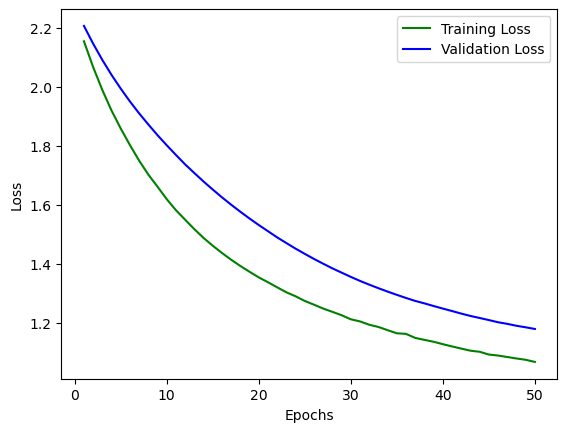

In [18]:
# Training Loss & Validation Loss:

trainloss = nn_modelcl.history.history['loss']
valueloss = nn_modelcl.history.history['val_loss']

epochs = range(1,50+1)

plt.plot(epochs, trainloss, 'g', label='Training Loss')
plt.plot(epochs, valueloss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

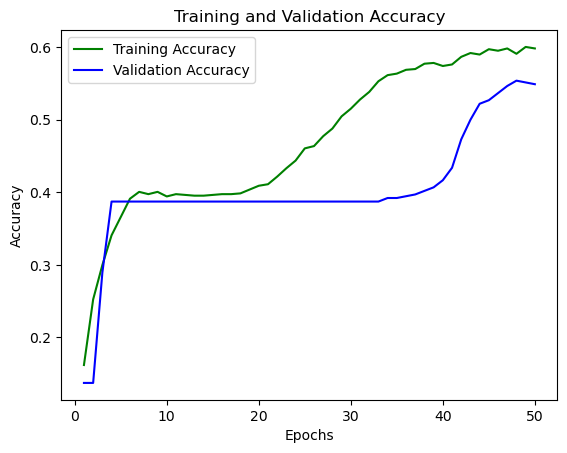

In [19]:
# Training and Validation Accuracy :

trainloss = nn_modelcl.history.history['accuracy']
valueloss = nn_modelcl.history.history['val_accuracy']

epochs = range(1,50+1)

plt.plot(epochs, trainloss, 'g', label='Training Accuracy')
plt.plot(epochs, valueloss, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [21]:
# Designing new architecture/update existing architecture in attempt to improve the performance of the model:

nn_modelsq = Sequential()

# Input Layer:
nn_modelsq.add(Dense(11, kernel_initializer='normal', input_dim = x_train.shape[1], activation='relu'))
nn_modelsq.add(BatchNormalization())

nn_modelsq.add(Dense(9, activation='relu'))
nn_modelsq.add(BatchNormalization())
nn_modelsq.add(Dropout(0.15))

# Output Layer:
nn_modelsq.add(Dense(6, activation='softmax'))  

# Compile the network:
nn_modelsq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_modelsq.summary()

Model: "sequential_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 dense_3 (Dense)             (None, 11)                132       

                                                                 

 batch_normalization_1 (Batc  (None, 11)               44        

 hNormalization)                                                 

                                                                 

 dense_4 (Dense)             (None, 9)                 108       

                                                                 

 batch_normalization_2 (Batc  (None, 9)                36        

 hNormalization)                                                 

                                                                 

 dropout (Dropout)           (None, 9)                 0         

                                                                 

 dense_5 (Dense)             (None, 6)

In [22]:
nn_modelsq.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [23]:
model_train = nn_modelsq.fit(sx_train, y_train, validation_data=(sx_test, y_test), epochs=100, batch_size=32)

Epoch 1/100

30/30 [==============================] - 1s 18ms/step - loss: 2.2651 - accuracy: 0.1630 - val_loss: 1.7174 - val_accuracy: 0.4044

Epoch 2/100

30/30 [==============================] - 0s 4ms/step - loss: 1.9001 - accuracy: 0.2471 - val_loss: 1.6557 - val_accuracy: 0.4387

Epoch 3/100

30/30 [==============================] - 0s 4ms/step - loss: 1.7584 - accuracy: 0.3060 - val_loss: 1.5978 - val_accuracy: 0.4681

Epoch 4/100

30/30 [==============================] - 0s 4ms/step - loss: 1.5971 - accuracy: 0.3870 - val_loss: 1.5433 - val_accuracy: 0.4730

Epoch 5/100

30/30 [==============================] - 0s 4ms/step - loss: 1.5334 - accuracy: 0.4395 - val_loss: 1.4899 - val_accuracy: 0.4877

Epoch 6/100

30/30 [==============================] - 0s 4ms/step - loss: 1.4224 - accuracy: 0.4900 - val_loss: 1.4336 - val_accuracy: 0.5172

Epoch 7/100

30/30 [==============================] - 0s 4ms/step - loss: 1.3729 - accuracy: 0.5300 - val_loss: 1.3804 - val_accuracy: 0.5294

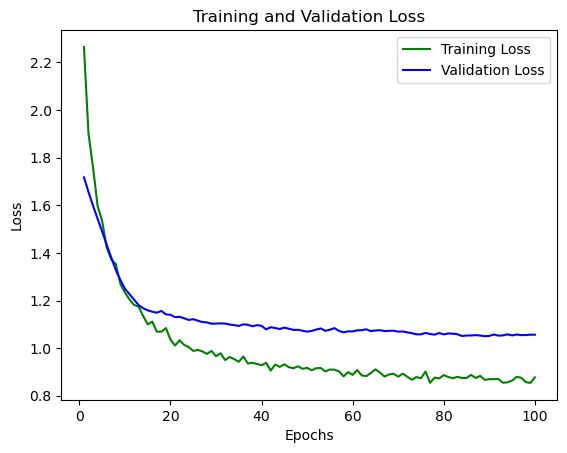

In [24]:
# Training Loss and Validation Loss :

trainloss = nn_modelsq.history.history['loss']
valueloss = nn_modelsq.history.history['val_loss']

epochs = range(1,100+1)

plt.plot(epochs, trainloss, 'g', label='Training Loss')
plt.plot(epochs, valueloss, 'b', label='Validation Loss')

plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

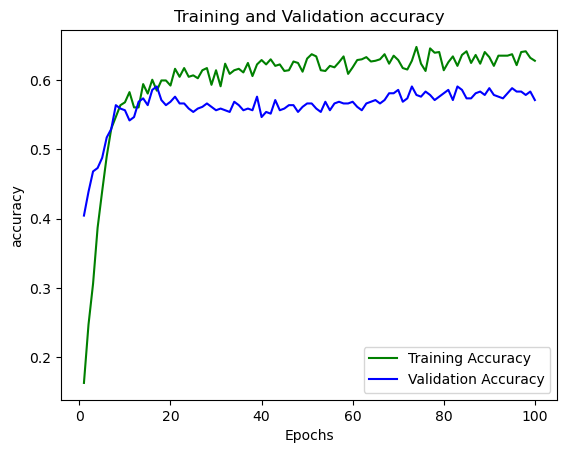

In [25]:
# Training Accuracy and Validation Accuracy :

trainaccu = nn_modelsq.history.history['accuracy']
valueaccu = nn_modelsq.history.history['val_accuracy']

epochs = range(1,100+1)

plt.plot(epochs, trainaccu, 'g', label='Training Accuracy')
plt.plot(epochs, valueaccu, 'b', label='Validation Accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.legend()
plt.show()